In [20]:
"""
Linear Regression Has Many Implementations

some are more accurate than others.
"""

'\nLinear Regression Has Many Implementations\n\nsome are more accurate than others.\n'

In [21]:
import numpy as np

def make_independent_regression_data(n_samples=200, noise=0.5, random_state=None):
    rng = np.random.default_rng(random_state)
    
    # Two independent features
    X = rng.normal(0, 1, size=(n_samples, 2))
    
    # True coefficients
    coef = np.array([2.0, -3.0])
    intercept = 5.0
    
    # Linear combination + noise
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    
    return X, y, coef, intercept

def make_correlated_regression_data(n_samples=200, noise=0.5, corr=0.95, random_state=None):
    rng = np.random.default_rng(random_state)
    
    # Start with one base feature
    x1 = rng.normal(0, 1, size=n_samples)
    
    # Make x2 highly correlated with x1
    x2 = corr * x1 + np.sqrt(1 - corr**2) * rng.normal(0, 1, size=n_samples)
    
    X = np.column_stack([x1, x2])
    
    # True coefficients
    coef = np.array([2.0, -3.0])
    intercept = 5.0
    
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    
    return X, y, coef, intercept


In [22]:
import numpy as np

def fit_linear_regression_1(X, y, add_bias=True):
    """
    Fits a linear regression model using the normal equation.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    add_bias : bool, default=True
        Whether to add a bias (intercept) column of ones.
    
    Returns
    -------
    params : np.ndarray
        Model parameters (including intercept if add_bias=True).
    """
    X = np.asarray(X)
    y = np.asarray(y)

    if add_bias:
        X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Normal equation: (XᵀX)⁻¹ Xᵀy
    params = np.linalg.solve(X.T @ X, X.T @ y)
    return params

def fit_linear_regression_2(X, y, add_bias=True):
    """
    Fits a linear regression model using the normal equation.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    add_bias : bool, default=True
        Whether to add a bias (intercept) column of ones.
    
    Returns
    -------
    params : np.ndarray
        Model parameters (including intercept if add_bias=True).
    """
    X = np.asarray(X)
    y = np.asarray(y)

    if add_bias:
        X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Normal equation: (XᵀX)⁻¹ Xᵀy
    params = np.linalg.inv(X.T @ X) @ X.T @ y
    return params


def predict_linear_regression(X, params, add_bias=True):
    """
    Makes predictions using the fitted parameters.
    """
    X = np.asarray(X)
    if add_bias:
        X = np.hstack([np.ones((X.shape[0], 1)), X])
    return X @ params


def mean_squared_error(y_true, y_pred):
    """
    Computes Mean Squared Error (MSE).
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)


In [23]:
X1, y1, coef1, intercept1 = make_independent_regression_data(random_state=42)
X2, y2, coef2, intercept2 = make_correlated_regression_data(random_state=42)

print("Independent features correlation:\n", np.corrcoef(X1.T))
print("Highly correlated features correlation:\n", np.corrcoef(X2.T))

# Fit model
print("Using no Inversion method:")
params = fit_linear_regression_1(X1, y1)
print("Fitted params:", params)

# Predict and check error
y_pred = predict_linear_regression(X1, params)
mse = mean_squared_error(y1, y_pred)
print("MSE:", mse)

# Compare with true values
print("True intercept and coef:", intercept1, coef1)

# Fit model
print("Using Inversion in LR:")
params = fit_linear_regression_2(X1, y1)
print("Fitted params:", params)

# Predict and check error
y_pred = predict_linear_regression(X1, params)
mse = mean_squared_error(y1, y_pred)
print("MSE:", mse)

# Compare with true values
print("True intercept and coef:", intercept1, coef1)

Independent features correlation:
 [[1.         0.06048074]
 [0.06048074 1.        ]]
Highly correlated features correlation:
 [[1.         0.93184114]
 [0.93184114 1.        ]]
Using no Inversion method:
Fitted params: [ 4.96527113  1.99108027 -3.02665254]
MSE: 0.25633323685065357
True intercept and coef: 5.0 [ 2. -3.]
Using Inversion in LR:
Fitted params: [ 4.96527113  1.99108027 -3.02665254]
MSE: 0.2563332368506535
True intercept and coef: 5.0 [ 2. -3.]


In [24]:
# Fit model
print("Using no Inversion method:")
params = fit_linear_regression_1(X2, y2)
print("Fitted params:", params)

# Predict and check error
y_pred = predict_linear_regression(X2, params)
mse = mean_squared_error(y2, y_pred)
print("MSE:", mse)

# Compare with true values
print("True intercept and coef:", intercept2, coef2)

# Fit model
print("Using Inversion in LR:")
params = fit_linear_regression_2(X2, y2)
print("Fitted params:", params)

# Predict and check error
y_pred = predict_linear_regression(X2, params)
mse = mean_squared_error(y2, y_pred)
print("MSE:", mse)

# Compare with true values
print("True intercept and coef:", intercept2, coef2)

Using no Inversion method:
Fitted params: [ 4.9648478   1.92745076 -2.95063862]
MSE: 0.25622505977975224
True intercept and coef: 5.0 [ 2. -3.]
Using Inversion in LR:
Fitted params: [ 4.9648478   1.92745076 -2.95063862]
MSE: 0.25622505977975224
True intercept and coef: 5.0 [ 2. -3.]


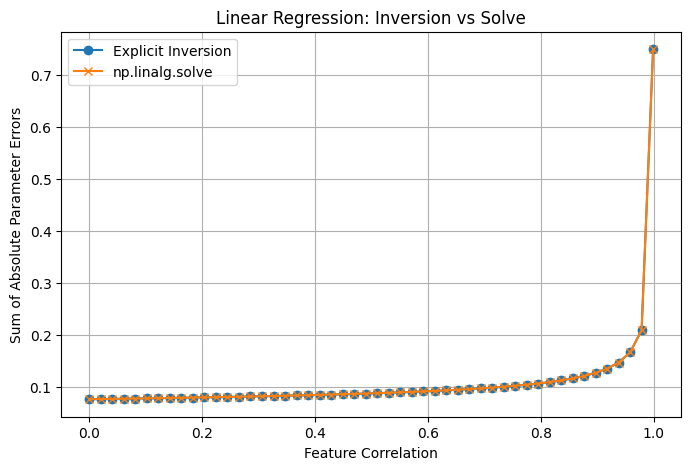

In [25]:
""" The Growing Difference in Accuracy

Between solve and inv, the inv version is less accurate on 
multicollinear data. It becomes instable.
"""
import numpy as np
import matplotlib.pyplot as plt

def make_correlated_data(n_samples=200, corr=0.0, noise=0.5, random_state=None):
    rng = np.random.default_rng(random_state)
    x1 = rng.normal(0, 1, size=n_samples)
    x2 = corr * x1 + np.sqrt(1 - corr**2) * rng.normal(0, 1, size=n_samples)
    X = np.column_stack([x1, x2])
    coef = np.array([2.0, -3.0])
    intercept = 5.0
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    return X, y, coef, intercept

def fit_linear_regression_inv(X, y):
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

def fit_linear_regression_solve(X, y):
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.linalg.solve(Xb.T @ Xb, Xb.T @ y)

# Experiment
correlations = np.linspace(0, 0.999, 50)
errors_inv = []
errors_solve = []

for corr in correlations:
    X, y, coef, intercept = make_correlated_data(corr=corr, random_state=42)
    
    params_inv = fit_linear_regression_inv(X, y)
    params_solve = fit_linear_regression_solve(X, y)
    
    # Parameter error = sum of absolute differences from true params
    true_params = np.hstack([intercept, coef])
    errors_inv.append(np.sum(np.abs(params_inv - true_params)))
    errors_solve.append(np.sum(np.abs(params_solve - true_params)))

# Plot
plt.figure(figsize=(8,5))
plt.plot(correlations, errors_inv, label='Explicit Inversion', marker='o')
plt.plot(correlations, errors_solve, label='np.linalg.solve', marker='x')
plt.xlabel('Feature Correlation')
plt.ylabel('Sum of Absolute Parameter Errors')
plt.title('Linear Regression: Inversion vs Solve')
plt.legend()
plt.grid(True)
plt.show()


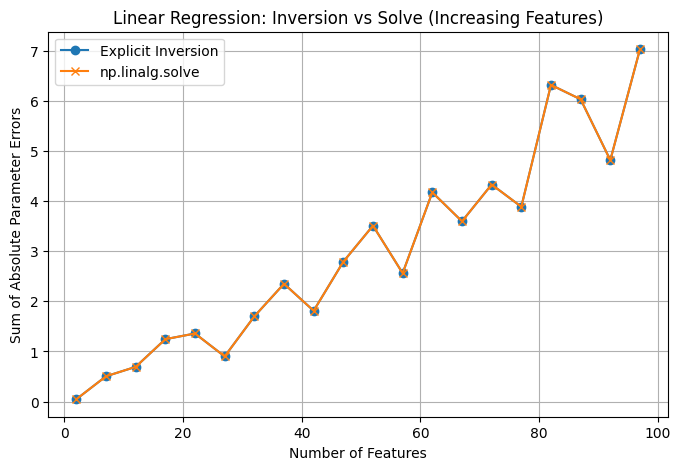

In [26]:
"""
Differenes in Accuract Grow with Dimensionality

More features lead to more numerical instability
"""

import numpy as np
import matplotlib.pyplot as plt

def make_high_dimensional_data(n_samples=200, n_features=50, corr=0.8, noise=0.5, random_state=None):
    rng = np.random.default_rng(random_state)
    
    # Start with independent features
    X_base = rng.normal(0, 1, size=(n_samples, 1))
    X = X_base.copy()
    
    # Generate correlated features
    for _ in range(n_features - 1):
        new_feat = corr * X_base[:, 0] + np.sqrt(1 - corr**2) * rng.normal(0, 1, size=n_samples)
        X = np.column_stack([X, new_feat])
    
    # True coefficients
    coef = rng.uniform(-2, 2, size=n_features)
    intercept = 5.0
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    
    return X, y, coef, intercept

# Regression methods
def fit_inv(X, y):
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

def fit_solve(X, y):
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.linalg.solve(Xb.T @ Xb, Xb.T @ y)

# Experiment over increasing number of features
feature_counts = range(2, 101, 5)
errors_inv = []
errors_solve = []

for n_feat in feature_counts:
    X, y, coef, intercept = make_high_dimensional_data(n_features=n_feat, random_state=42)
    true_params = np.hstack([intercept, coef])
    
    params_inv = fit_inv(X, y)
    params_solve = fit_solve(X, y)
    
    errors_inv.append(np.sum(np.abs(params_inv - true_params)))
    errors_solve.append(np.sum(np.abs(params_solve - true_params)))

# Plot
plt.figure(figsize=(8,5))
plt.plot(feature_counts, errors_inv, label='Explicit Inversion', marker='o')
plt.plot(feature_counts, errors_solve, label='np.linalg.solve', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('Sum of Absolute Parameter Errors')
plt.title('Linear Regression: Inversion vs Solve (Increasing Features)')
plt.legend()
plt.grid(True)
plt.show()


Full SSD duration: 0.0016s
Partial SSD (SVD) duration: 0.0002s
Max coefficient difference between methods: 4.352e-14


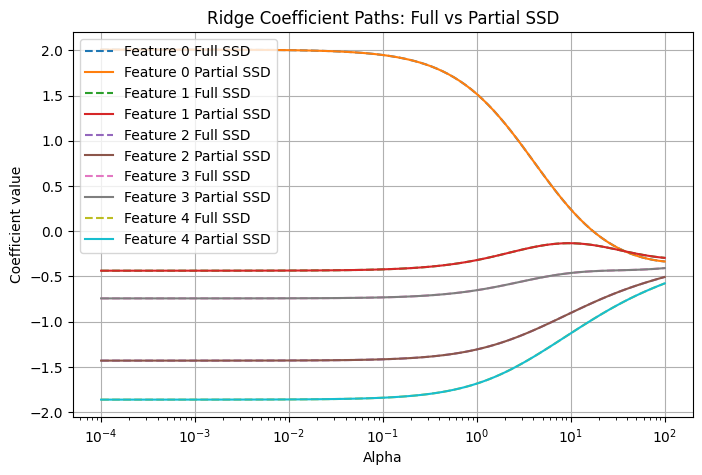

In [27]:
import numpy as np
import time

# --- Generate highly correlated data ---
def make_correlated_data(n_samples=200, corr=0.95, n_features=5, noise=0.5, random_state=None):
    rng = np.random.default_rng(random_state)
    X_base = rng.normal(0, 1, size=(n_samples, 1))
    X = X_base.copy()
    for _ in range(n_features - 1):
        new_feat = corr * X_base[:, 0] + np.sqrt(1 - corr**2) * rng.normal(0, 1, size=n_samples)
        X = np.column_stack([X, new_feat])
    coef = rng.uniform(-2, 2, size=n_features)
    intercept = 5.0
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    return X, y, coef, intercept

# --- Ridge Regression: Full SSD ---
def ridge_full_ssd(X, y, alphas):
    n, p = X.shape
    coefs = []
    start = time.time()
    for alpha in alphas:
        beta = np.linalg.solve(X.T @ X + alpha * np.eye(p), X.T @ y)
        rss = np.sum((y - X @ beta)**2)  # full SSD
        coefs.append(beta)
    duration = time.time() - start
    return np.array(coefs), duration

# --- Ridge Regression: Partial SSD (SVD-based) ---
def ridge_partial_ssd(X, y, alphas):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    Uy = U.T @ y
    coefs = []
    start = time.time()
    for alpha in alphas:
        # beta = V (Σ^2 + α I)^(-1) Σ U^T y
        d = S / (S**2 + alpha)
        beta = Vt.T @ (d * Uy)
        coefs.append(beta)
    duration = time.time() - start
    return np.array(coefs), duration

# --- Experiment ---
X, y, true_coef, intercept = make_correlated_data(n_features=5, corr=0.95, random_state=42)
alphas = np.logspace(-4, 2, 100)

coefs_full, time_full = ridge_full_ssd(X, y, alphas)
coefs_partial, time_partial = ridge_partial_ssd(X, y, alphas)

# --- Compare ---
print(f"Full SSD duration: {time_full:.4f}s")
print(f"Partial SSD (SVD) duration: {time_partial:.4f}s")

# Compute max absolute difference in coefficients
max_diff = np.max(np.abs(coefs_full - coefs_partial))
print(f"Max coefficient difference between methods: {max_diff:.3e}")

# Optional: plot coefficient paths
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_full[:, i], '--', label=f'Feature {i} Full SSD')
    plt.plot(alphas, coefs_partial[:, i], '-', label=f'Feature {i} Partial SSD')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficient Paths: Full vs Partial SSD')
plt.legend()
plt.grid(True)
plt.show()


Full svd duration: 1.5639s
Partial svd (SVD) duration: 0.1525s
Max RSS difference between methods: 1.350e-08


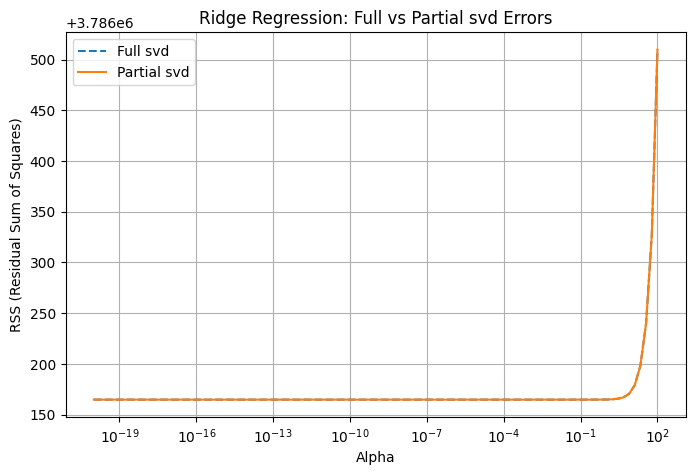

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time

# --- Generate highly correlated data ---
def make_correlated_data(n_samples=200, corr=0.95, n_features=5, noise=0.5, random_state=None):
    rng = np.random.default_rng(random_state)
    X_base = rng.normal(0, 1, size=(n_samples, 1))
    X = X_base.copy()
    for _ in range(n_features - 1):
        new_feat = corr * X_base[:, 0] + np.sqrt(1 - corr**2) * rng.normal(0, 1, size=n_samples)
        X = np.column_stack([X, new_feat])
    coef = rng.uniform(-2, 2, size=n_features)
    intercept = 5.0
    y = intercept + X @ coef + rng.normal(0, noise, size=n_samples)
    return X, y, coef, intercept

# --- Ridge Regression: Full svd ---
def ridge_full_svd(X, y, alphas):
    n, p = X.shape
    rss_list = []
    start = time.time()
    for alpha in alphas:
        beta = np.linalg.solve(X.T @ X + alpha * np.eye(p), X.T @ y)
        rss = np.sum((y - X @ beta)**2)  # full svd
        rss_list.append(rss)
    duration = time.time() - start
    return np.array(rss_list), duration

# --- Ridge Regression: Partial svd (SVD-based) ---
def ridge_partial_svd(X, y, alphas):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    Uy = U.T @ y
    rss_list = []
    start = time.time()
    for alpha in alphas:
        d = S / (S**2 + alpha)
        beta = Vt.T @ (d * Uy)
        y_pred = X @ beta
        rss = np.sum((y - y_pred)**2)
        rss_list.append(rss)
    duration = time.time() - start
    return np.array(rss_list), duration

# --- Experiment ---
X, y, true_coef, intercept = make_correlated_data(n_samples=150000, n_features=50, corr=0.99, random_state=42)
alphas = np.logspace(-20, 2, 100)

rss_full, time_full = ridge_full_svd(X, y, alphas)
rss_partial, time_partial = ridge_partial_svd(X, y, alphas)

# --- Compare ---
print(f"Full svd duration: {time_full:.4f}s")
print(f"Partial svd (SVD) duration: {time_partial:.4f}s")

max_rss_diff = np.max(np.abs(rss_full - rss_partial))
print(f"Max RSS difference between methods: {max_rss_diff:.3e}")

# --- Plot RSS / errors ---
plt.figure(figsize=(8,5))
plt.plot(alphas, rss_full, '--', label='Full svd')
plt.plot(alphas, rss_partial, '-', label='Partial svd')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RSS (Residual Sum of Squares)')
plt.title('Ridge Regression: Full vs Partial svd Errors')
plt.legend()
plt.grid(True)
plt.show()
